# 生成随机的 w 序列
可以采用洗牌算法生成
```
Random(W):
1   N <- length(W)
2   for i <- 1 to N
3       do swap W[i] <-> W(random(i, N))
```

In [8]:
import random
import numpy as np
import math
def swap(a, b):
    a, b = b, a

N = 34
W = np.ones(N)
for i in range(N):
    if i % 2 == 0:
        W[i] = -1

for i in range(N):
    swap(W[i], W[random.randint(i, N-1)])

import os 

with open("./data/w.dat", mode='w') as file:
    file.write(str(int(N)))
    file.write("\n")
    for i in range(N):
        file.write(str(int(W[i])))
        file.write(" ")


list = [ str(int(elem)) for elem in W]
col = math.floor(math.sqrt(N))
pad = col - N % col
print(pad)
row = (N + pad) // col
out = list + ["" for i in range(pad)]
out = np.array(out).reshape(row, col)
for i in range(row):
    print(", ".join(out[i]) + ",")

1
-1, 1, -1, 1, -1,
1, -1, 1, -1, 1,
-1, 1, -1, 1, -1,
1, -1, 1, -1, 1,
-1, 1, -1, 1, -1,
1, -1, 1, -1, 1,
-1, 1, -1, 1, ,


# zigzag 排序
zigzag 排序如下
![zigzag](images/zigzag.png)

可以看到，移动的情况如下：
1. 左边的格子跳到右边的格子，只能在第一行或最后一行进行，且此时纵坐标为偶数
2. 从上边的格子跳到下边的格子，只能在第一列或最后一列，且此时横坐标为奇数
3. 从右上到左下，横纵坐标之和为奇数
4. 从左下到右上，横纵坐标之和为偶数

据此可以写出 `python` 代码来生成 $8\times 8$ 矩阵的 zigzag 序列

生成的是矩阵二维坐标转换为一维后，在 一维 zigzag 序列中的索引，如： `zigzag[2] = 1 * 8 + 0`

可以利用 zigzag 序列找出块的中频系数（用红色表示）

`python` 计算出的结果可以绘制下图：

![my-zigzag](images/my-zigzag.png)

生成 $K$ 个中频系数

zig:
0, 1, 8, 16, 9, 2, 3, 10,
17, 24, 32, 25, 18, 11, 4, 5,
12, 19, 26, 33, 40, 48, 41, 34,
27, 20, 13, 6, 7, 14, 21, 28,
35, 42, 49, 56, 57, 50, 43, 36,
29, 22, 15, 23, 30, 37, 44, 51,
58, 59, 52, 45, 38, 31, 39, 46,
53, 60, 61, 54, 47, 55, 62, 63,
zig_mid: [7, 14, 21, 28, 35, 42, 49, 56]


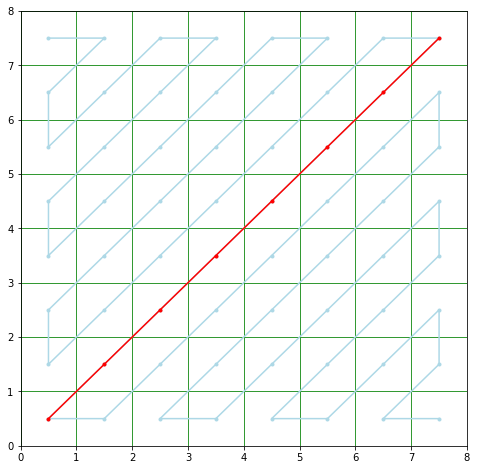

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

def zigzag(n):
    matr = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matr[i][j] = i * n + j;
    
    res = np.zeros(n * n);
    steps = 0
    i = 0
    j = 0
    while steps < n * n:
        res[steps] = int(matr[i][j])
        if (i == 0 or i == n - 1) and (j % 2 == 0):
            j = j + 1
        elif (j == 0 or j == n - 1) and (i % 2 == 1):
            i = i + 1
        elif (i + j) % 2 == 1:
            i = i + 1
            j = j - 1
        else:
            i = i - 1
            j = j + 1
        steps = steps + 1
    return res

n = 8
zig = [int(elem) for elem in zigzag(n)]
out = np.array(zig).reshape(n, n)
print("zig:")
for i in range(n):
    cur = [str(elem) for elem in out[i]]
    print(", ".join(cur) + ",")

K = 8

mid = math.floor((n * n + 1) / 2)
low = mid - (math.floor(K / 2))
high = mid + (math.ceil(K / 2))
zig_mid = zig[low : high]
print("zig_mid:", zig_mid)

with open("./data/zig_mid.dat",'w') as file:
    file.write(str(K))
    file.write("\n")
    for i in range(K):
        file.write(str(zig_mid[i]))
        file.write(" ")

# 画图
x_pos = [elem % n + 0.5 for elem in zig]
y_pos = [8 - (elem // n + 0.5) for elem in zig]

x_pos_mid = [elem % n + 0.5 for elem in zig_mid]
y_pos_mid = [8 - (elem // n + 0.5) for elem in zig_mid]

pos = zip(x_pos, y_pos)
pos_mid = zip(x_pos_mid, y_pos_mid)
pos_rest = [elem for elem in pos if elem not in pos_mid]
x_pos_rest, y_pos_rest = zip(*pos_rest)

plt.figure(figsize = (n, n))
plt.axis([0, n, 0, n])
plt.plot(x_pos_rest, y_pos_rest, color = 'lightblue', marker = '.')
plt.plot(x_pos_mid, y_pos_mid, color = 'r', marker = '.')
plt.grid(color = 'g')

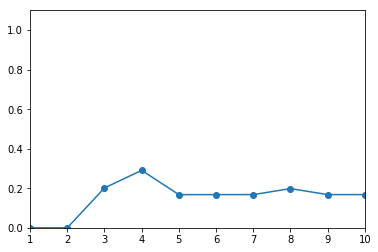

: 

In [10]:
import os
import matplotlib.pyplot as plt

rate = []
with open("build/rate.dat") as file:
    lines = file.readlines()
    for line in lines:
        rate.append(float(line))

delta = [elem + 1 for elem in range(10)]
plt.plot(delta, rate, marker = 'o')
plt.ylim(0, 1.1)
plt.xlim(delta[0], delta[-1])
plt.show()